<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第4章 未知のデータを知るための推測統計

In [1]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot settings
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

%config InlineBackend.figure_format='retina'

In [2]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=15b07c1e5b027358c5b67d756343fd4523b8aa70fc45da59139a4cfa1f32c5e2
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib

＃ ランダムサンプリングによる標本抽出

In [4]:
from scipy.stats import norm

In [5]:
# コード17: 身長データの母集団を生成

np.random.seed(71)
n_data = 50000000

# 日本人男性5000万人の身長を模したデータを生成。これを母集団とする。
# 母集団 171.4cm, 母標準偏差 5.8cm
height_men = norm.rvs(loc=171.4, scale=5.8, size=n_data)
population_mean = np.mean(height_men)
population_std = np.std(height_men)
print(f"母集団: {population_mean:.1f}, 母標準偏差: {population_std:.1f}")

母集団: 171.4, 母標準偏差: 5.8


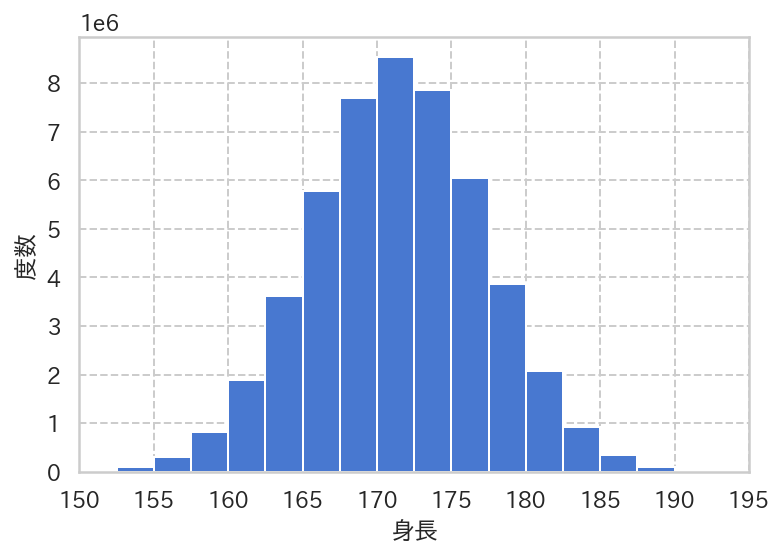

In [6]:
plt.figure(figsize=(6,4))
plt.hist(height_men, bins=np.arange(140, 200, 2.5))
plt.xlim(150, 195)
plt.ylabel("度数")
plt.xlabel("身長")
plt.show()

In [7]:
# コード18: 10個のサンプルを抽出した例

np.random.seed(71)
# ランダムサンプリングするための添え字をシャッフルして作る
index = np.arange(n_data)
np.random.shuffle(index)

# ためしに最初の10個を見てみる
print("ランダムサンプリング対象の添字：")
print(index[:10].tolist())

height_men_sampled = height_men[index[:10]]
print("ランダムサンプリングされた身長データ：")
print(height_men_sampled)


ランダムサンプリング対象の添字：
[828356, 46136347, 17344906, 34132860, 48809383, 34778100, 43945431, 20780887, 32401764, 46842498]
ランダムサンプリングされた身長データ：
[173.68608975 180.44404174 161.66773558 175.32291427 167.8998898
 166.79531723 176.93333008 169.00385705 171.8846459  165.51519627]
